In [1]:
from ase.io import read
from ase.visualize import view
import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
import numpy as np
%matplotlib inline

In [8]:
plt.rcParams["figure.dpi"]=150
plt.rcParams["figure.facecolor"]="white"
plt.rcParams["figure.figsize"]=(6,6)

In [9]:
def get_vacuum_energy(prefix, conf="B", avg_type='local'):
    
    outfile = f"/scratch/kilian/out/conf_{conf}/{prefix}/avg.dat"
    
    with open(outfile) as f:
        lines = f.readlines()
        
    if avg_type == 'local':
        avg_ind = 1
    else:
        avg_ind = 2

    max_f = float(lines[0].split()[avg_ind])
    min_f = float(lines[0].split()[avg_ind])
    for line in lines:
        V = float(line.split()[avg_ind])
        if V > max_f:
            max_f = V
        if V < min_f:
            min_f = V
            
    return round(max_f,4)

def get_symm_pt(prefix, conf, spec_path=None, plot_brouillon=False):
    print(conf)
    outfile = f"/scratch/kilian/out/conf_{conf}/{prefix}/{prefix}_bands.out"
    
    with open(outfile) as f:
        lines = f.readlines()
    
    coords = []
    for line in lines:
        if "high-symmetry point:" in line:
            coords.append(float(line.split(' ')[-1]))
            
    
    relax = f"/scratch/kilian/out/conf_{conf}/{prefix}/{prefix}_relax.pwo"
    atoms = read(relax, format='espresso-out')

    lat = atoms.cell.get_bravais_lattice()
    pts_list = lat.get_special_points()
    pts = ''.join([str(item) for item in pts_list])
    path = list(atoms.cell.bandpath(pts, npoints=100).path)
    
    if plot_brouillon == True:
        atoms.cell.bandpath(pts, npoints=100).plot()
        plt.show()
    
    if spec_path == None:
        return dict(zip(path, coords))
    else:
        my_path = {}
        print(spec_path, coords)
        for i,p in enumerate(spec_path):
            my_path[spec_path[i]] = coords[i]
        return my_path

In [21]:
def plot_bands(prefix, conf, fermi=None, plot_brouillon=False, ylimit=None, br=False):
    
    confname=conf[0]
    datadir = f"/scratch/kilian/out/conf_{confname}/"
    data = np.loadtxt(f"{datadir}{prefix}/{prefix}_bands.dat.gnu")
    k = np.unique(data[:, 0])
    bands = np.reshape(data[:, 1], (-1, len(k)))
        
    if conf == "C":
        spec_path = 'GYHG'
    elif conf == "Brr":
        spec_path = "GX"
    else:
        spec_path = None
    symms = get_symm_pt(prefix, confname, plot_brouillon=plot_brouillon, spec_path=spec_path)
    
    e_vacuum = get_vacuum_energy(prefix, conf=confname)
    print(e_vacuum)
    for band in range(len(bands)):
        #e_vacuum = 0
        scaled_band = np.subtract(bands[band, :], e_vacuum)
        if band > 21 and band < 33 and br == True:
            plt.plot(k, scaled_band, linewidth=1.25, alpha=1, color='r')
        else:
            plt.plot(k, scaled_band, linewidth=1, alpha=0.5, color='k')
        
    plt.xlim(min(k), max(k))
    plt.xticks(ticks= list(symms.values()), \
                labels=list(symms.keys()))

    if ylimit != None:
        plt.ylim(ylimit)
        
    for x in symms.values():
        plt.axvline(x, linewidth=0.75, color='k', alpha=0.5)
        
    if fermi != None:
        plt.axhline(fermi, linewidth=0.75, color='r', alpha=0.5)

    plt.ylabel('Energy (eV)')
    plt.title(prefix)
    plt.show()
    # fermi energy 

In [ ]:
plot_bands("C6H4_C6H4", "Brr", br=True)

B
GX [0.0, 0.5]
0.0285


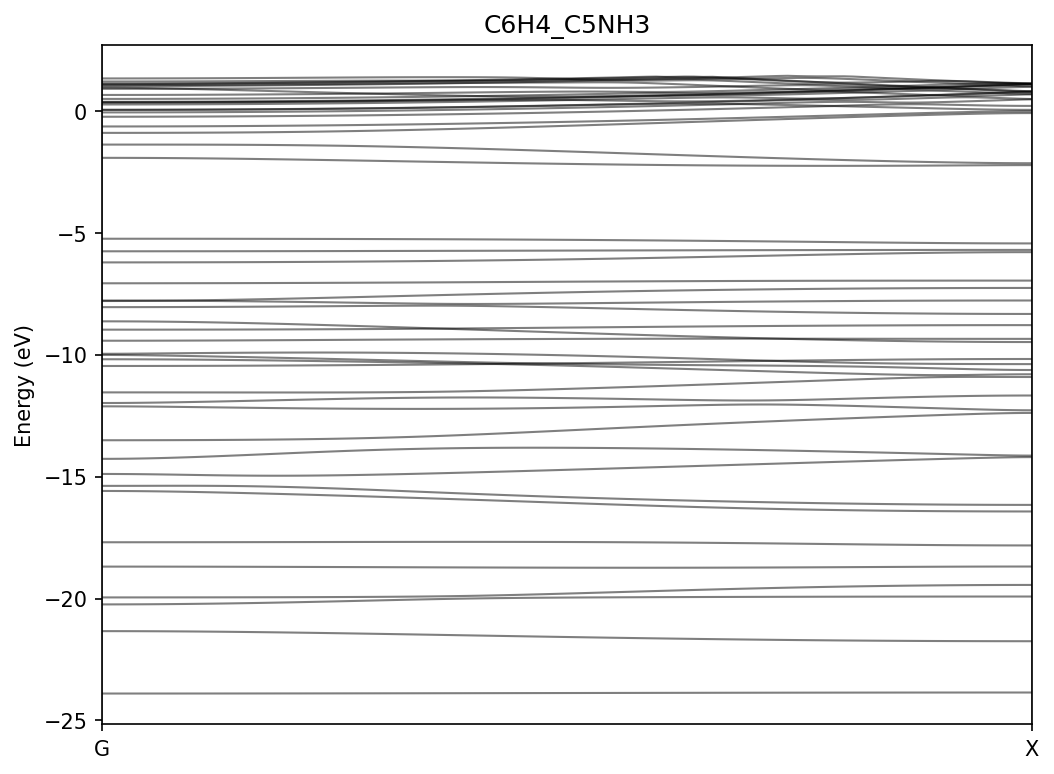

In [5]:
plot_bands("C6H4_C5NH3", "Brr")

In [1]:
stringn = "-21.1603 -18.4155 -18.4152 -14.7937 -14.7936 -12.7894 -11.1966 -10.7818 -10.1480 -10.1478 -8.9546 -8.1602 -8.1596 -6.2500 -6.2498 -1.1792 -1.1791  -0.4702   0.0002  0.0032   0.0508   0.2172   0.2663 0.3036 0.3306 0.3398 0.4048 0.4241 0.4931 0.5259 0.5467"

In [12]:
print(6.2498  -1.1792)

5.0706


ValueError: could not convert string to float: ''

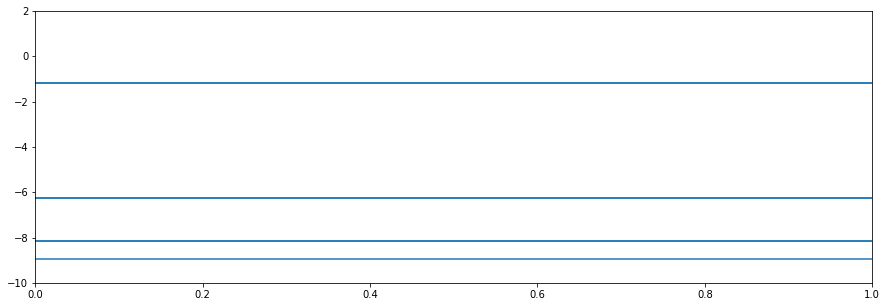

In [11]:
plt.figure(figsize=(15,5))
plt.ylim([-10,2])
strings = stringn.split(" ")
for s in strings:
    plt.axhline(float(s))
    


B
GX [0.0, 0.5]
0.0285


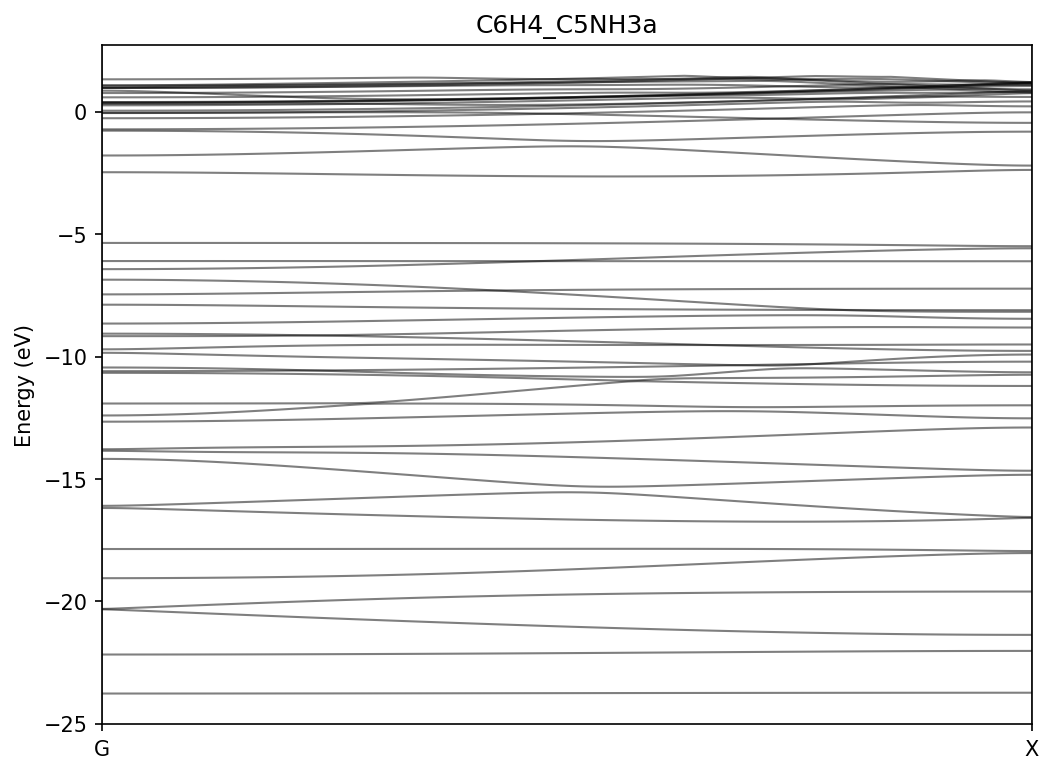

In [6]:
plot_bands("C6H4_C5NH3a", "Brr")

B
GX [0.0, 0.5]
0.0356


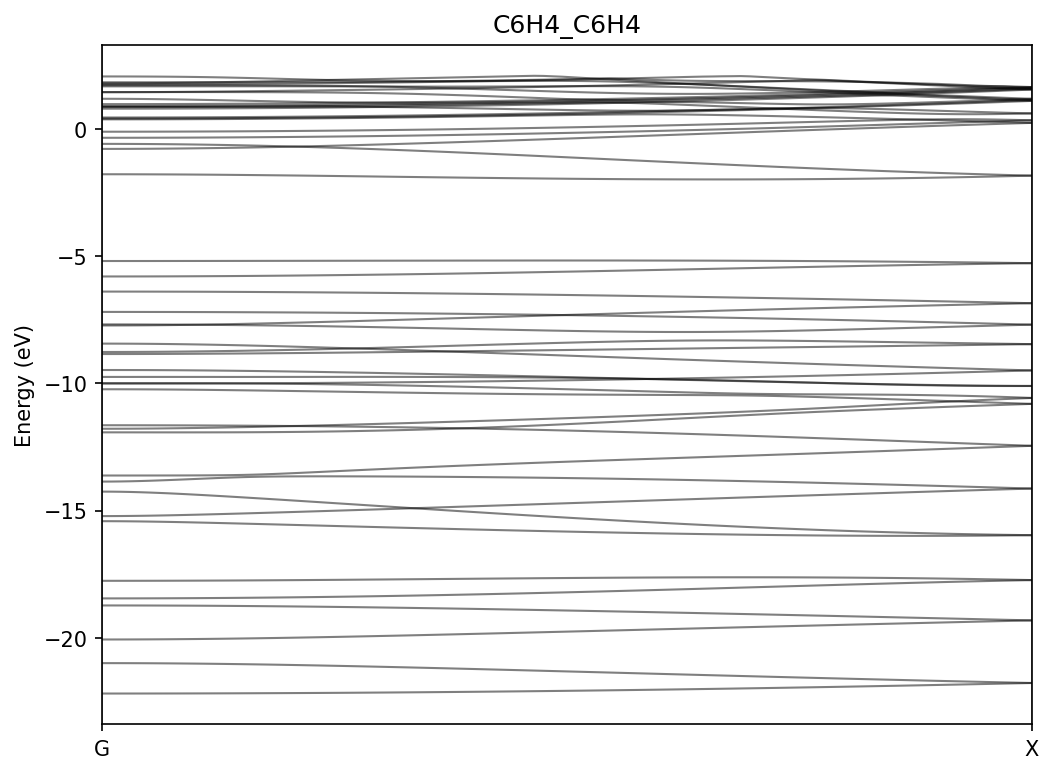

In [6]:
plot_bands("C6H4_C6H4", "Brr")

B
GX [0.0, 0.5]
0.0297


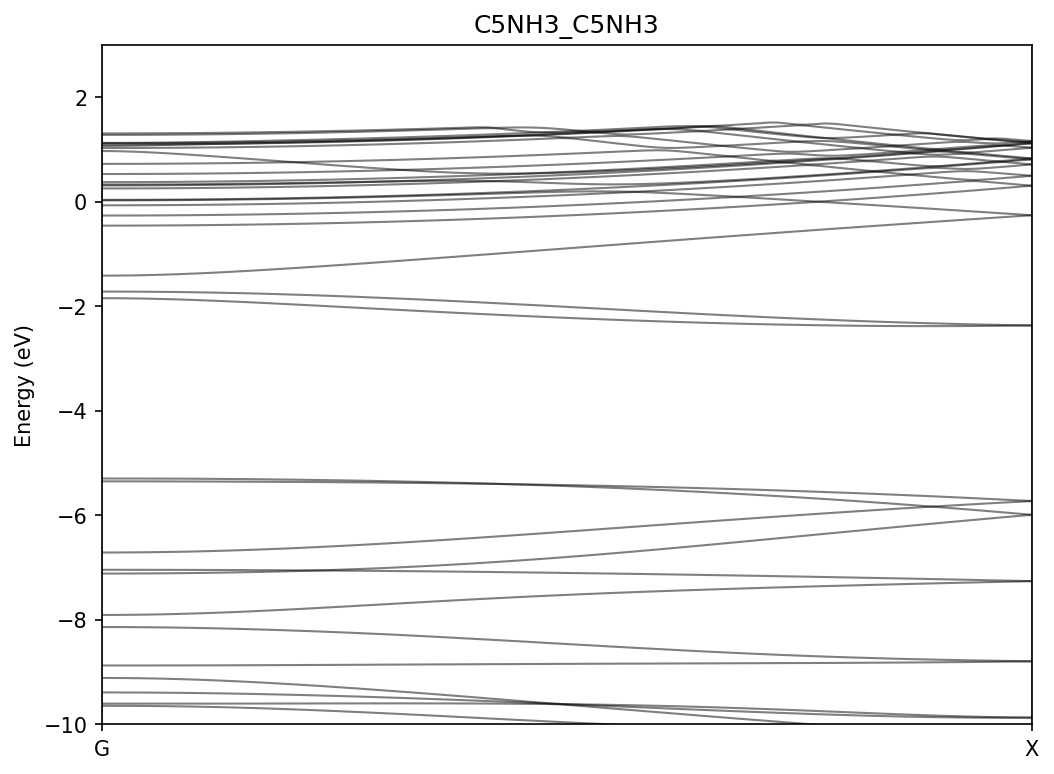

In [7]:
plot_bands("C5NH3_C5NH3", "Brr", ylimit=[-10,3])

B
GX [0.0, 0.5]
0.0357


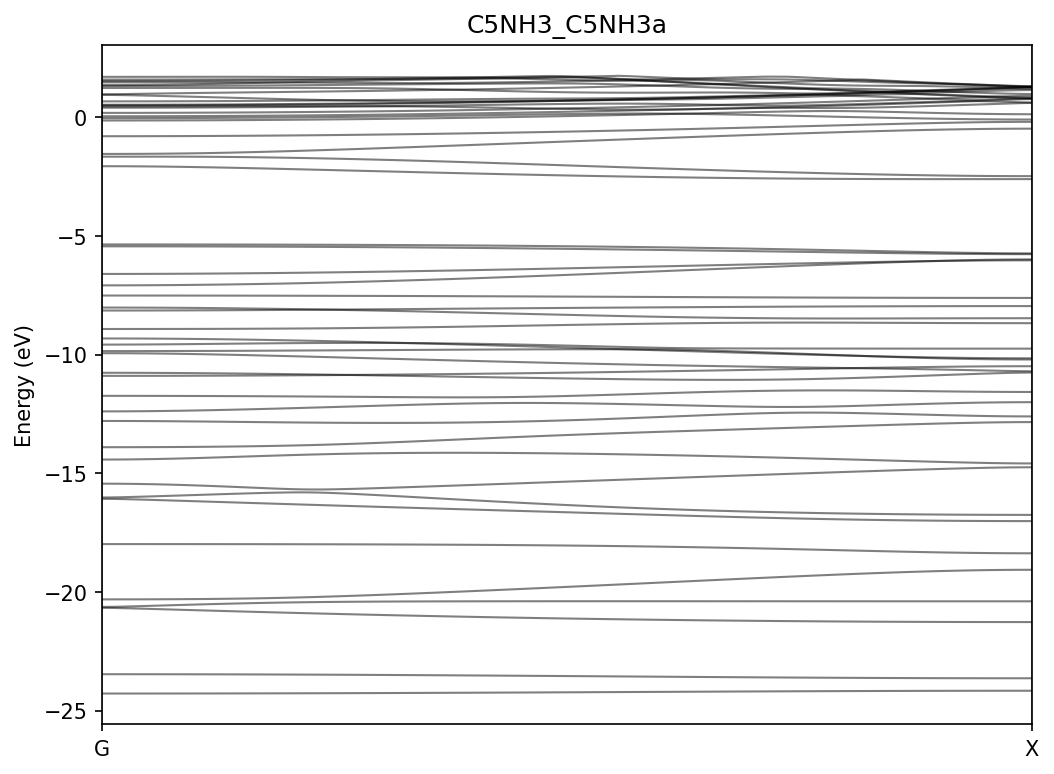

In [8]:
plot_bands("C5NH3_C5NH3a", "Brr")

B
GX [0.0, 0.5]
0.0288


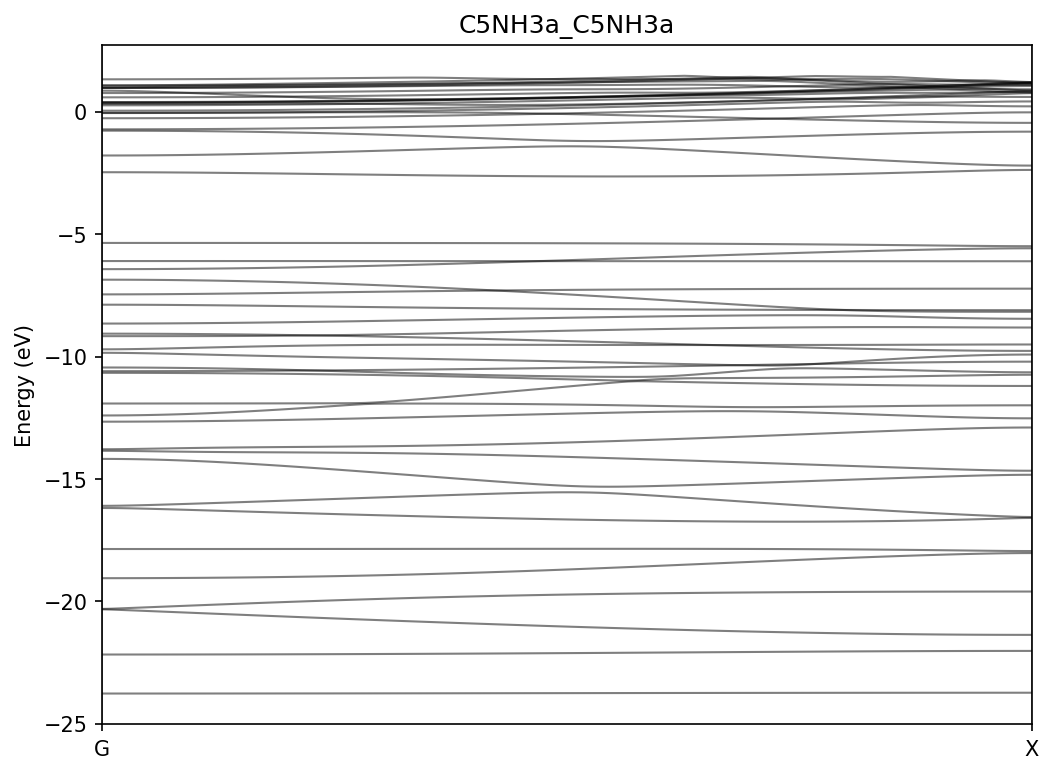

In [5]:
plot_bands("C5NH3a_C5NH3a", "Brr")

B
GX [0.0, 0.5]
0.007


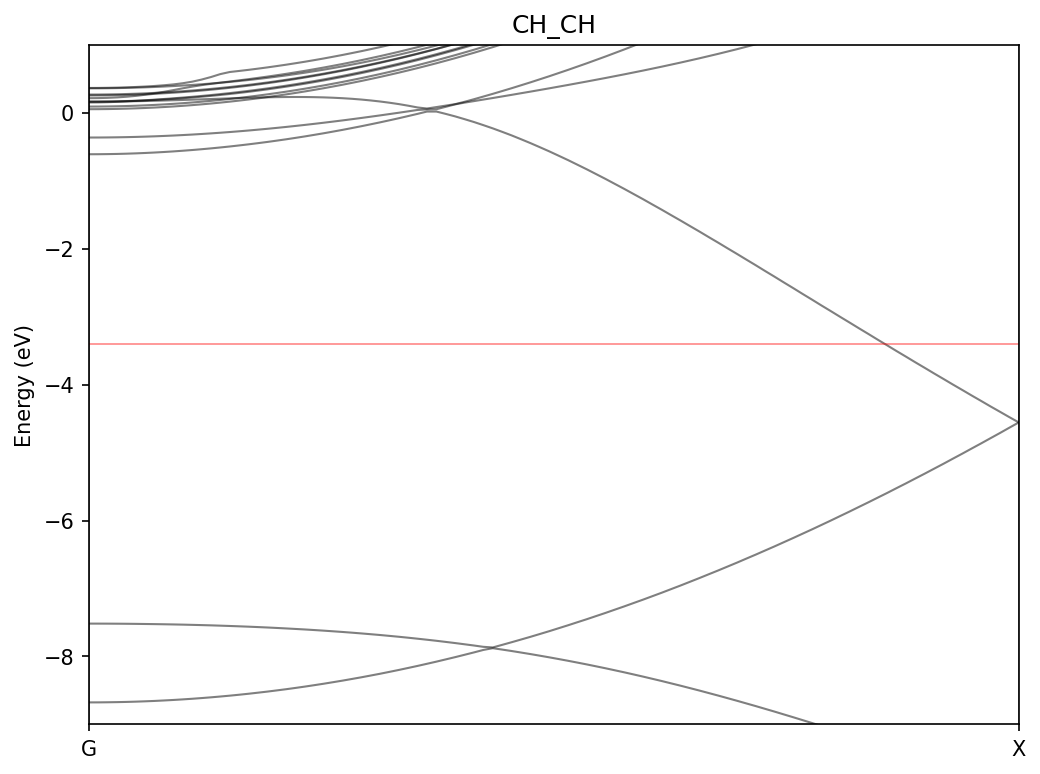

In [8]:
plot_bands("CH_CH", "Brr", fermi=-3.4033, ylimit=[-9,1])

In [14]:
plot_bands("CH_O", conf='Brr')

ValueError: cannot reshape array of size 1088 into shape (61)

B
GX [0.0, 0.5]
0.0335


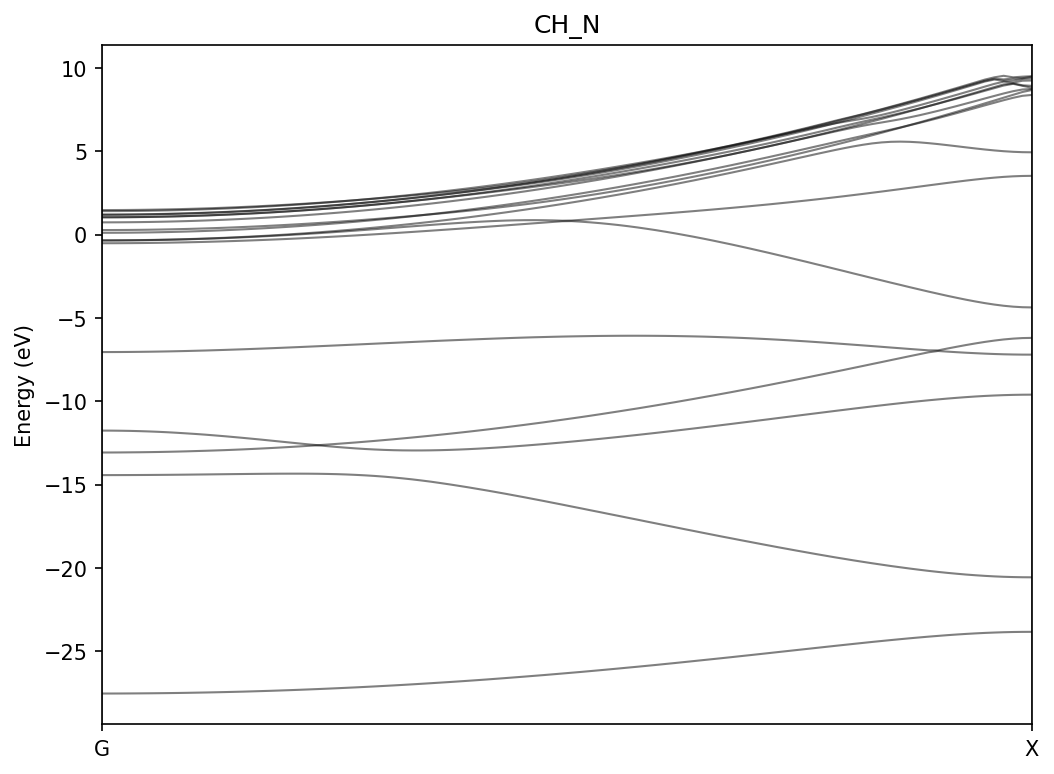

In [10]:
plot_bands("CH_N", conf='Brr')

B
GX [0.0, 0.5]


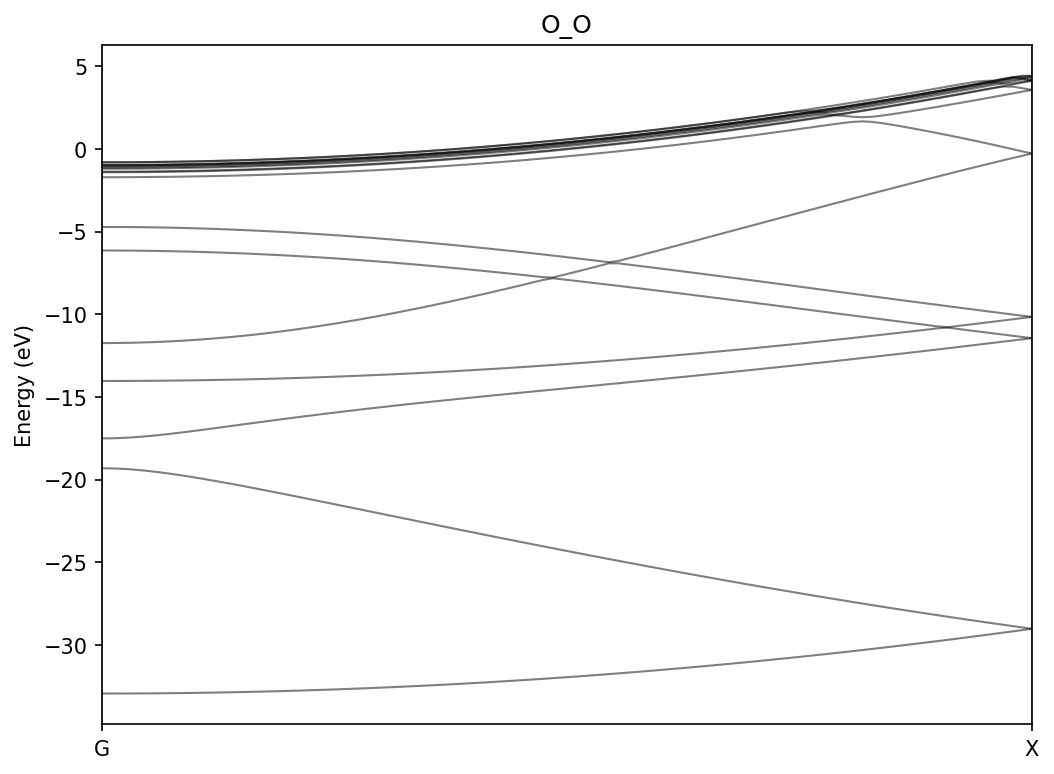

In [60]:
plot_bands("O_O", "Brr")

B
GX [0.0, 0.5]


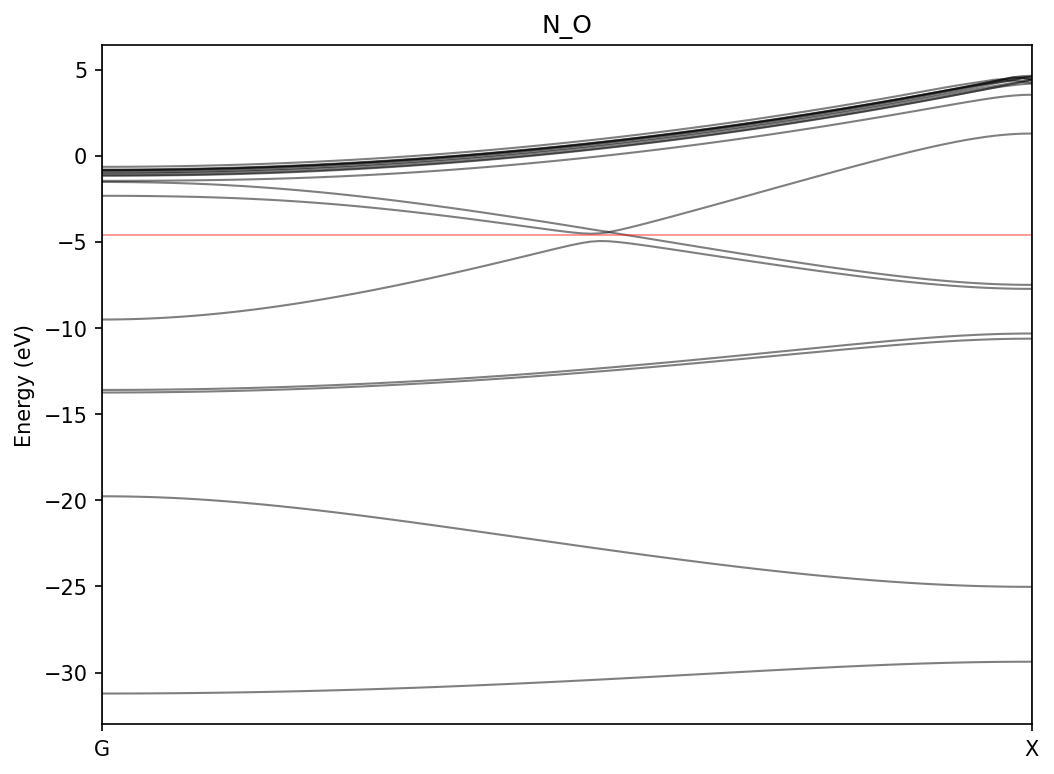

In [61]:
plot_bands("N_O", "Brr", fermi=-4.5933)

In [ ]:
plot_bands("N_O", "Brr", fermi=-4.5933)

# configuration c:

C
GYHG [0.0, 0.5725, 0.9087, 1.5726]
0.1077


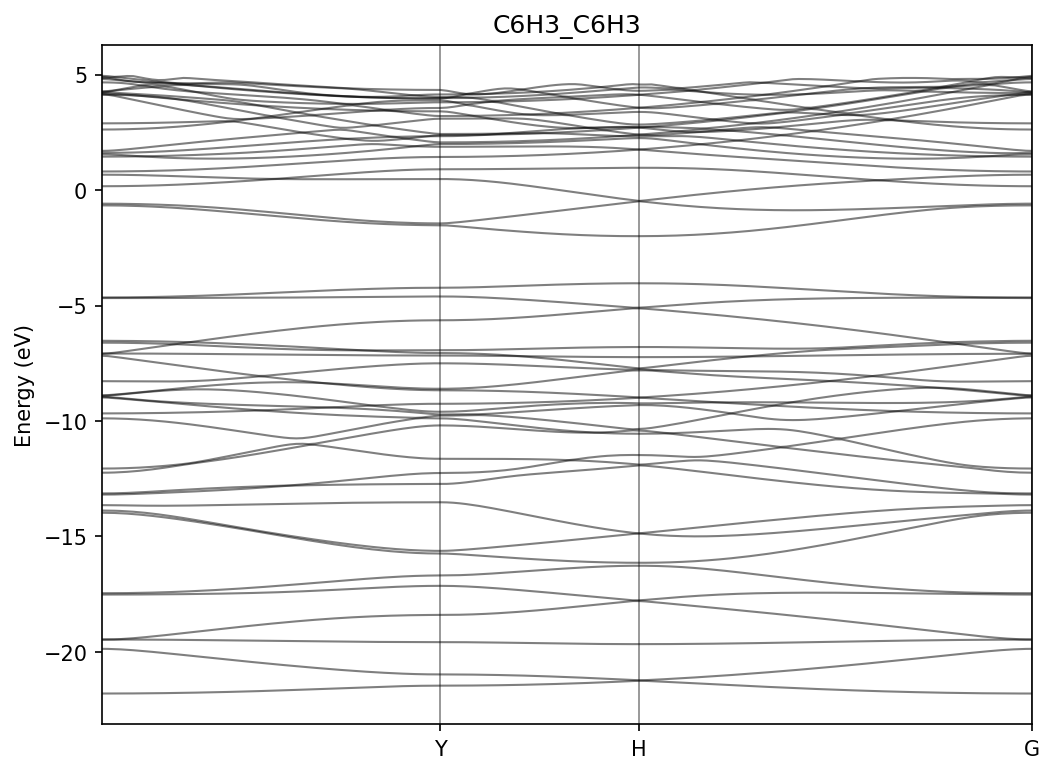

In [8]:
plot_bands("C6H3_C6H3", "C")

C
GYHG [0.0, 0.5725, 0.9087, 1.5726]
0.1077


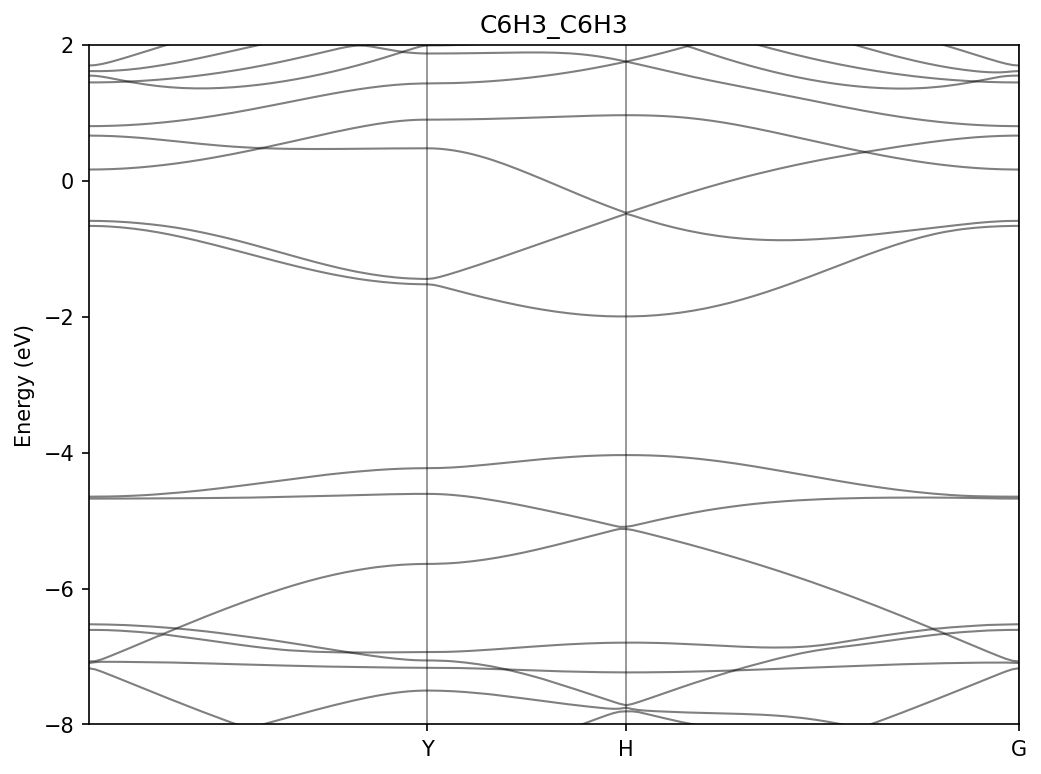

In [9]:
plot_bands("C6H3_C6H3", "C", ylimit=[-8, 2]) # -3.9587   -1.8386

C
GYHG [0.0, 0.5718, 0.9084, 1.5719]
0.1074


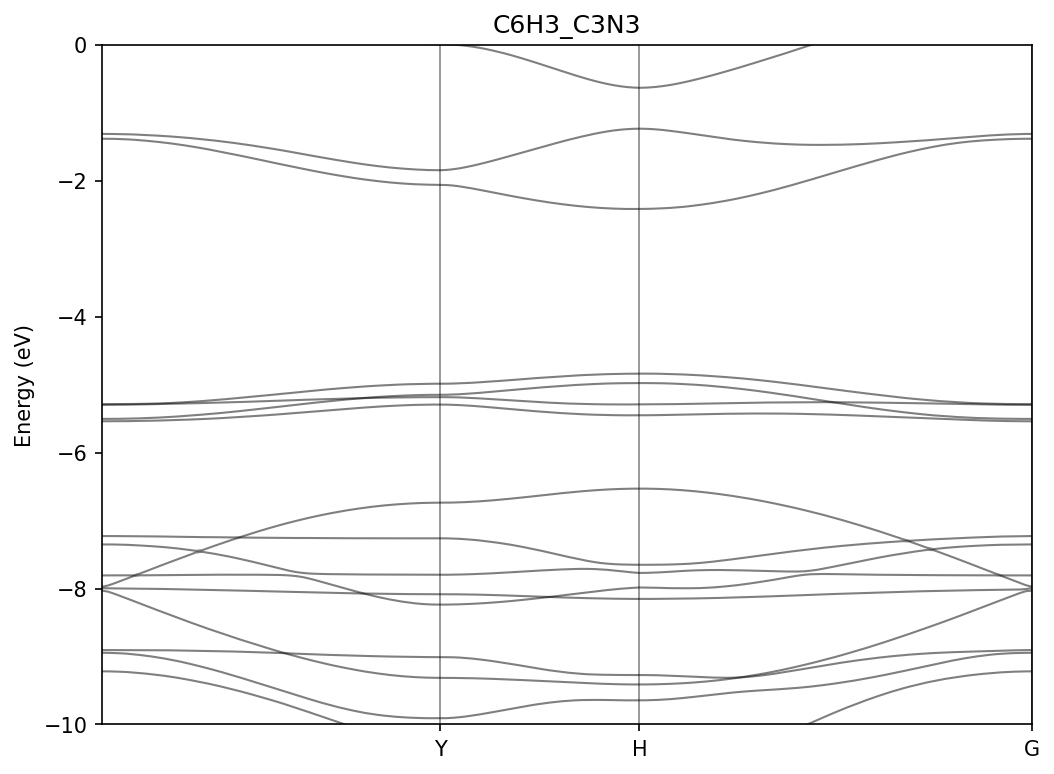

In [10]:
plot_bands("C6H3_C3N3", "C", ylimit=[-10,0]) # -4.7491   -2.2665

C
GYHG [0.0, 0.5647, 0.9053, 1.5647]
0.1002


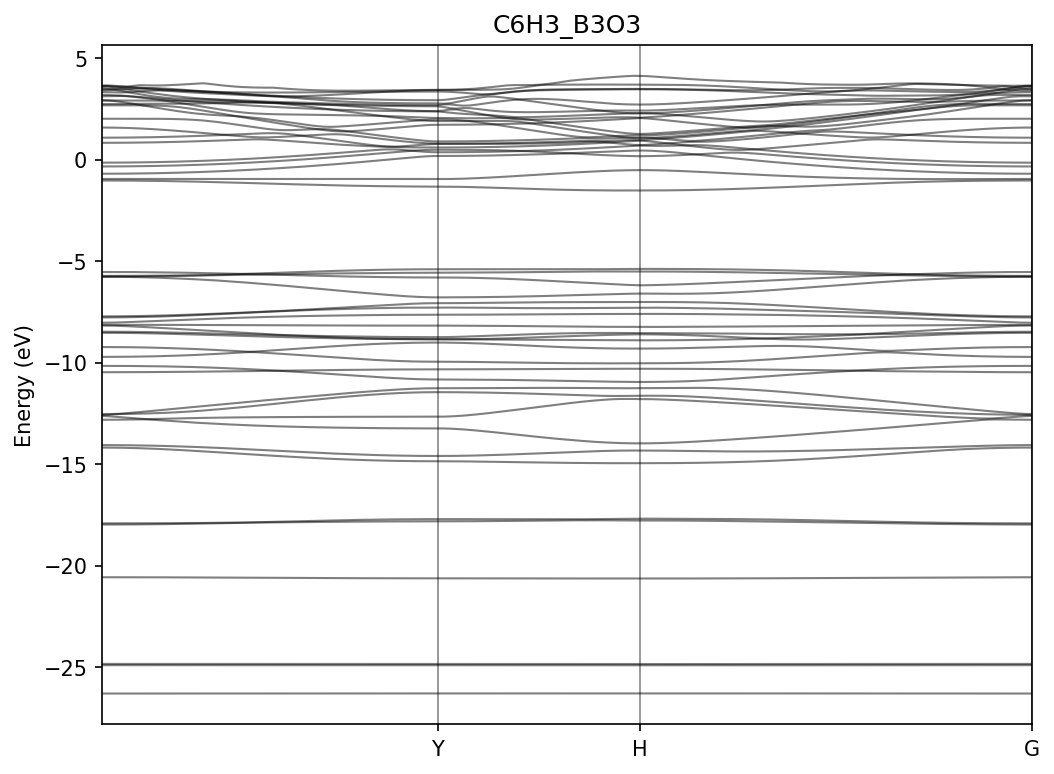

In [11]:
plot_bands("C6H3_B3O3", "C")

C
GYHG [0.0, 0.5713, 0.9082, 1.5714]
0.1048


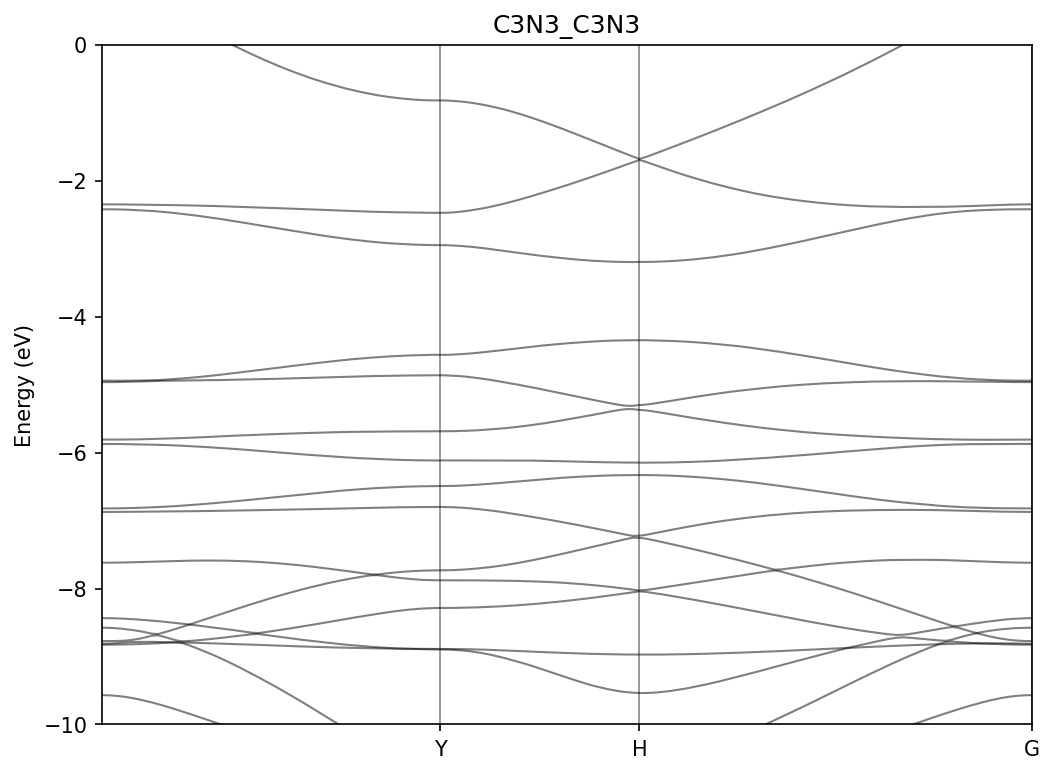

In [12]:
plot_bands("C3N3_C3N3", "C",ylimit=[-10,0]) # -4.2668   -3.0654

C
GYHG [0.0, 0.5636, 0.9048, 1.5637]
0.0969


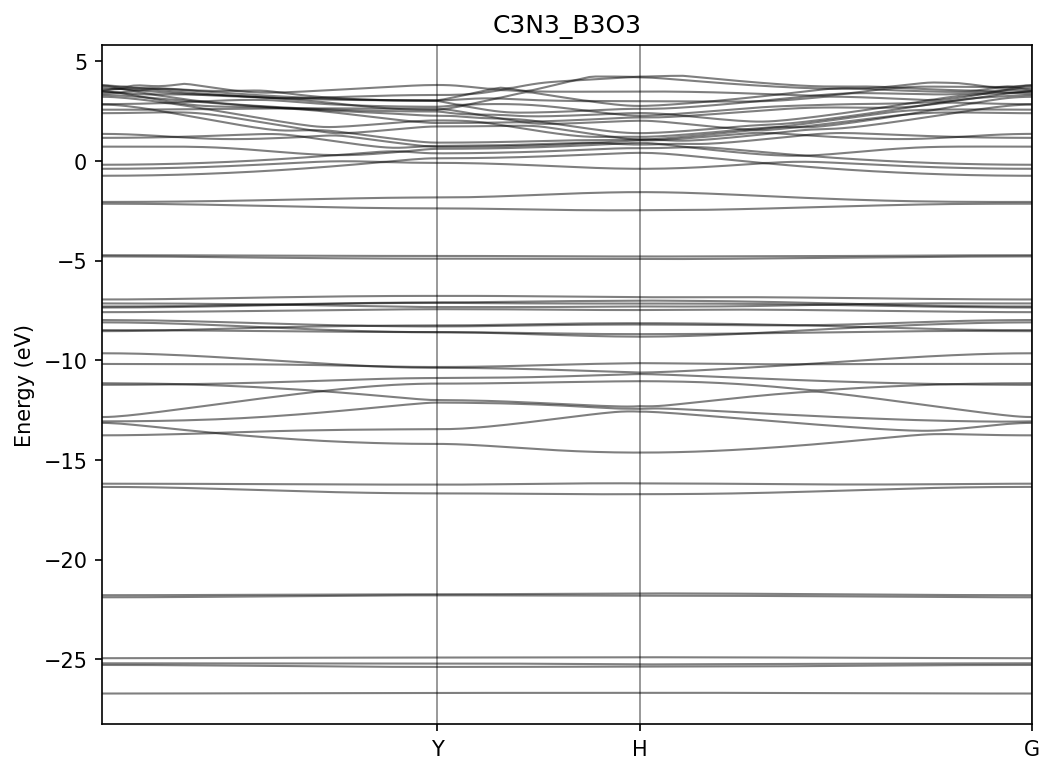

In [13]:
plot_bands("C3N3_B3O3", "C")

C
GYHG [0.0, 0.5489, 0.8984, 1.5491]
0.0899


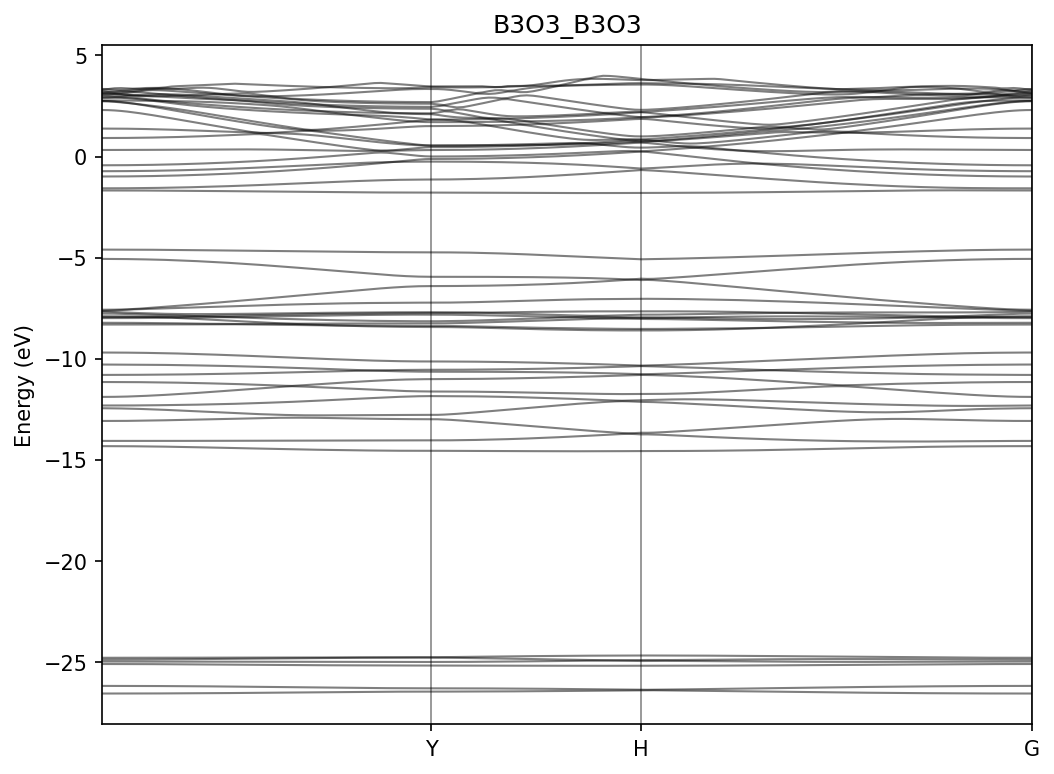

In [14]:
plot_bands("B3O3_B3O3", "C")

C
GYHG [0.0, 0.0615, 0.7282, 0.7898, 1.1287, 1.1903]
0.1402


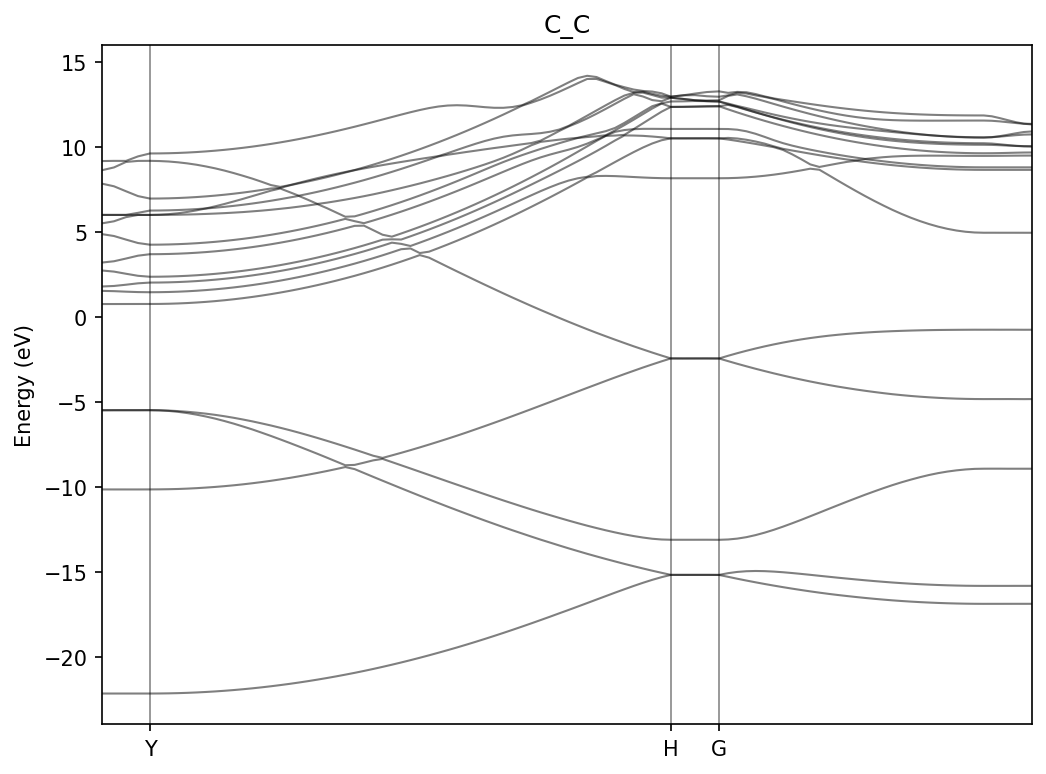

In [15]:
plot_bands("C_C", "C")

C
GYHG [0.0, 0.0668, 0.7334, 0.8002, 1.1402, 1.2069]
0.1322


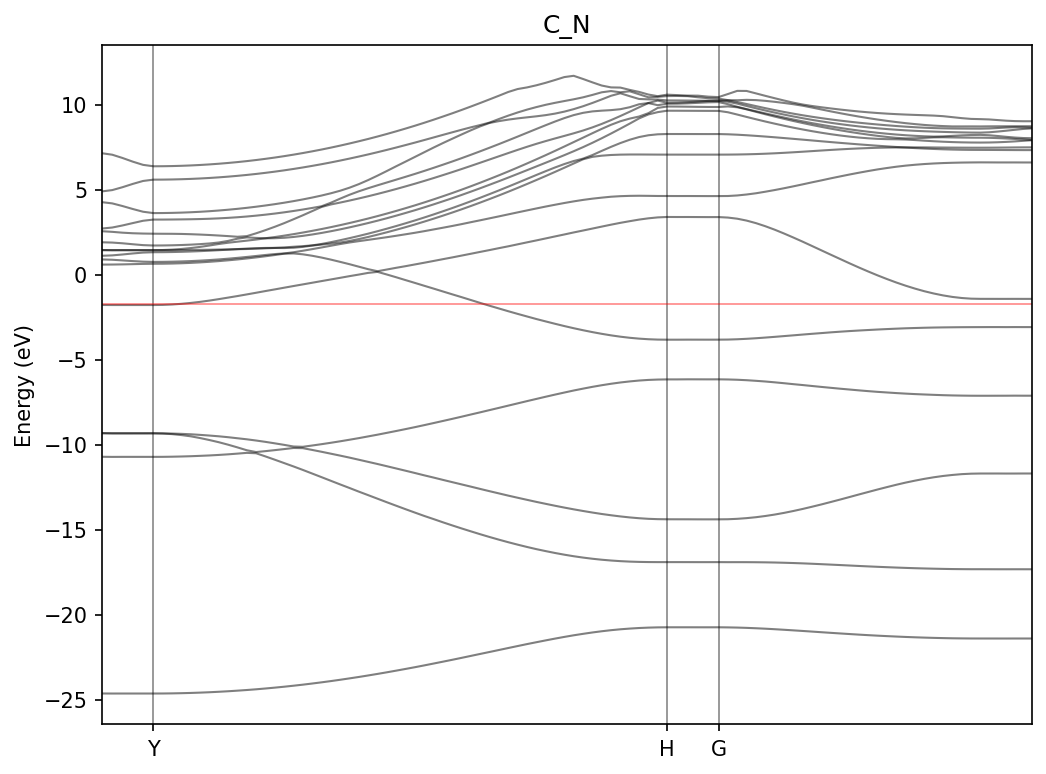

In [16]:
plot_bands("C_N", "C", fermi=-1.7192)

In [11]:
plot_bands("N_N", "C")

FileNotFoundError: /scratch/kilian/out/conf_C/N_N/N_N_bands.dat.gnu not found.